In [121]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [122]:
df = pd.read_csv('crime2013.csv')

In [123]:
df.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,ALABAMA,Abbeville,2645.0,11.0,1,1.0,NaN,2,7.0,63.0,21.0,39.0,3,NaN,NaN,NaN,NaN
1,ALABAMA,Adamsville,4481.0,19.0,1,0.0,NaN,7,11.0,321.0,58.0,252.0,11,NaN,NaN,NaN,
2,ALABAMA,Addison,744.0,1.0,0,1.0,NaN,0,0.0,25.0,6.0,17.0,2,NaN,NaN,NaN,
3,ALABAMA,Alabaster,31170.0,44.0,0,2.0,NaN,11,31.0,640.0,70.0,544.0,26,NaN,NaN,NaN,NaN
4,ALABAMA,Alexander City,14692.0,119.0,2,16.0,NaN,12,89.0,661.0,121.0,510.0,30,NaN,NaN,NaN,NaN


In [124]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3,Unnamed: 14,Unnamed: 15
count,9.289000e+03,9288.000000,9292.000000,5431.000000,3859.000000,9292.000000,9289.000000,9288.000000,9290.000000,9290.000000,9292.000000,8819.000000,0.0,0.0
mean,2.141811e+04,92.741387,1.102777,6.808138,7.001037,30.985364,55.068683,671.038221,139.585684,475.145318,56.947697,3.450505,NaN,NaN
std,1.189963e+05,781.948391,9.870297,33.288764,37.816808,328.422623,449.039312,3438.246377,709.404028,2411.860168,413.457540,24.290147,NaN,NaN
min,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2.318000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,36.000000,7.000000,25.000000,1.000000,0.000000,NaN,NaN
50%,5.902000e+03,10.000000,0.000000,1.000000,1.000000,1.000000,6.000000,118.000000,22.000000,87.000000,4.000000,0.000000,NaN,NaN
75%,1.627000e+04,35.000000,0.000000,4.000000,4.000000,7.000000,22.000000,419.000000,75.000000,321.000000,16.000000,2.000000,NaN,NaN
max,8.396126e+06,52384.000000,414.000000,1279.000000,1112.000000,19170.000000,31767.000000,141971.000000,23733.000000,117931.000000,14382.000000,1430.000000,NaN,NaN


In [125]:
df.isnull().sum()

State                                      0
City                                       0
Population                                 3
Violent crime                              4
Murder and nonnegligent manslaughter       0
Rape (revised definition)1              3861
Rape (legacy definition)2               5433
Robbery                                    0
Aggravated assault                         3
Property crime                             4
Burglary                                   2
Larceny-theft                              2
Motor vehicle theft                        0
Arson3                                   473
Unnamed: 14                             9292
Unnamed: 15                             9292
Unnamed: 16                             9290
dtype: int64

In [126]:
check = ['State','City']

for i in check:
    df[i] = pd.Categorical(df[i])
    df[i] = df[i].cat.codes  

In [127]:
df['Population']=df['Population'].fillna((df['Population'].median()))
df['Violent crime']=df['Violent crime'].fillna((df['Violent crime'].median()))
df['Rape (revised definition)1']=df['Rape (revised definition)1'].fillna((2000))
df['Rape (legacy definition)2']=df['Rape (legacy definition)2'].fillna((2000))
df['Aggravated assault']=df['Aggravated assault'].fillna((df['Aggravated assault'].median()))
df['Property crime']=df['Property crime'].fillna((df['Property crime'].median()))
df['Burglary']=df['Burglary'].fillna((df['Burglary'].median()))
df['Larceny-theft']=df['Larceny-theft'].fillna((df['Larceny-theft'].median()))
df['Arson3']=df['Arson3'].fillna((2000))



In [128]:
df.shape

(9292, 17)

In [129]:
df = df.drop(['Unnamed: 14','Unnamed: 15','Unnamed: 16'],axis=1)

In [130]:
df.describe()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3
count,9292.000000,9292.000000,9.292000e+03,9292.000000,9292.000000,9292.000000,9292.000000,9292.000000,9292.000000,9292.000000,9292.000000,9292.000000,9292.000000,9292.000000
mean,25.651098,3534.065217,2.141310e+04,92.705768,1.102777,835.016681,1172.300581,30.985364,55.052841,670.800151,139.560375,475.061774,56.947697,105.082867
std,13.751515,2064.154912,1.189774e+05,781.781933,9.870297,982.649797,982.453769,328.422623,448.967676,3437.525317,709.329767,2411.607285,413.457540,439.506094
min,0.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1759.750000,2.318000e+03,2.000000,0.000000,1.000000,2.000000,0.000000,2.000000,36.000000,7.000000,25.000000,1.000000,0.000000
50%,28.000000,3514.500000,5.902000e+03,10.000000,0.000000,8.000000,2000.000000,1.000000,6.000000,118.000000,22.000000,87.000000,4.000000,0.000000
75%,37.000000,5307.000000,1.626850e+04,35.000000,0.000000,2000.000000,2000.000000,7.000000,22.000000,419.000000,75.000000,321.000000,16.000000,2.000000
max,49.000000,7141.000000,8.396126e+06,52384.000000,414.000000,2000.000000,2000.000000,19170.000000,31767.000000,141971.000000,23733.000000,117931.000000,14382.000000,2000.000000


In [131]:
df.dtypes

State                                      int8
City                                      int16
Population                              float64
Violent crime                           float64
Murder and nonnegligent manslaughter      int64
Rape (revised definition)1              float64
Rape (legacy definition)2               float64
Robbery                                   int64
Aggravated assault                      float64
Property crime                          float64
Burglary                                float64
Larceny-theft                           float64
Motor vehicle theft                       int64
Arson3                                  float64
dtype: object

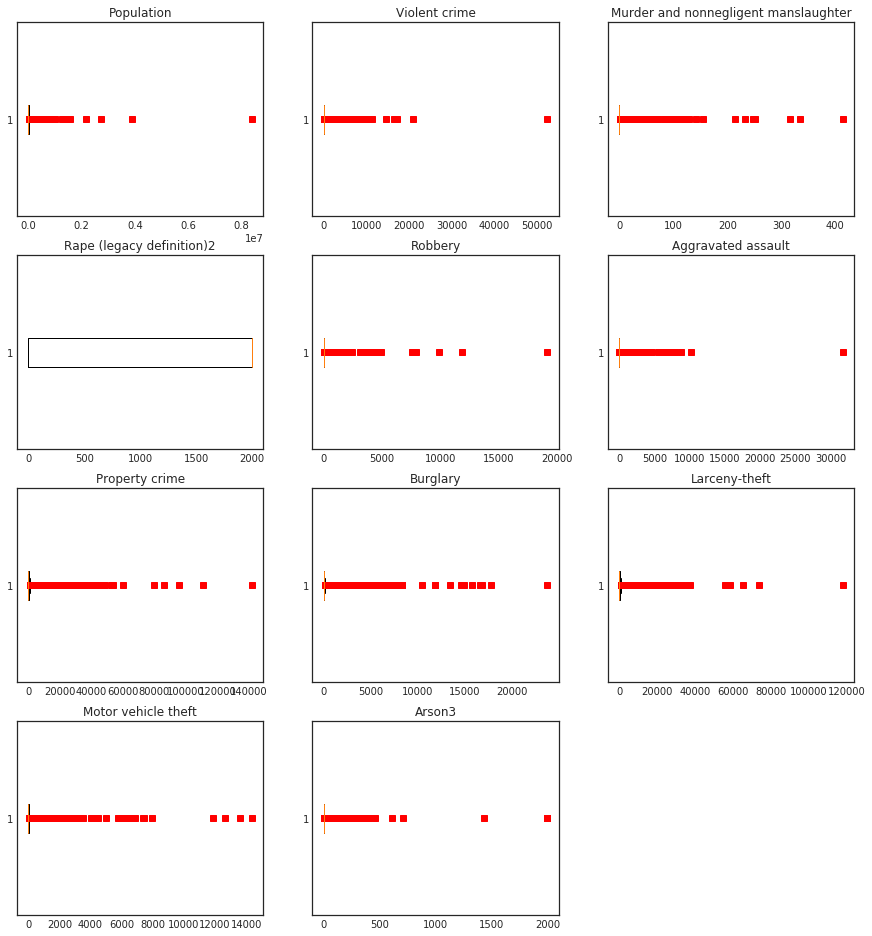

In [132]:
check=['Population','Violent crime','Murder and nonnegligent manslaughter','Rape (legacy definition)2','Robbery','Aggravated assault','Property crime',
      'Burglary','Larceny-theft','Motor vehicle theft','Arson3']
plt.figure(figsize=(15, 25))
counter=1

for i in check:
    plt.subplot(6,3,counter)
    plt.boxplot(df[i], 0, 'rs', 0)
    plt.title(i)
    counter+=1
plt.show()


In [133]:
test = df[df['Population']>8000000]

In [134]:
test

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3
5443,31,4382,8396126.0,52384.0,335,2000.0,1112.0,19170,31767.0,141971.0,16606.0,117931.0,7434,2000.0


In [135]:
df = df[df['Population']<8000000]

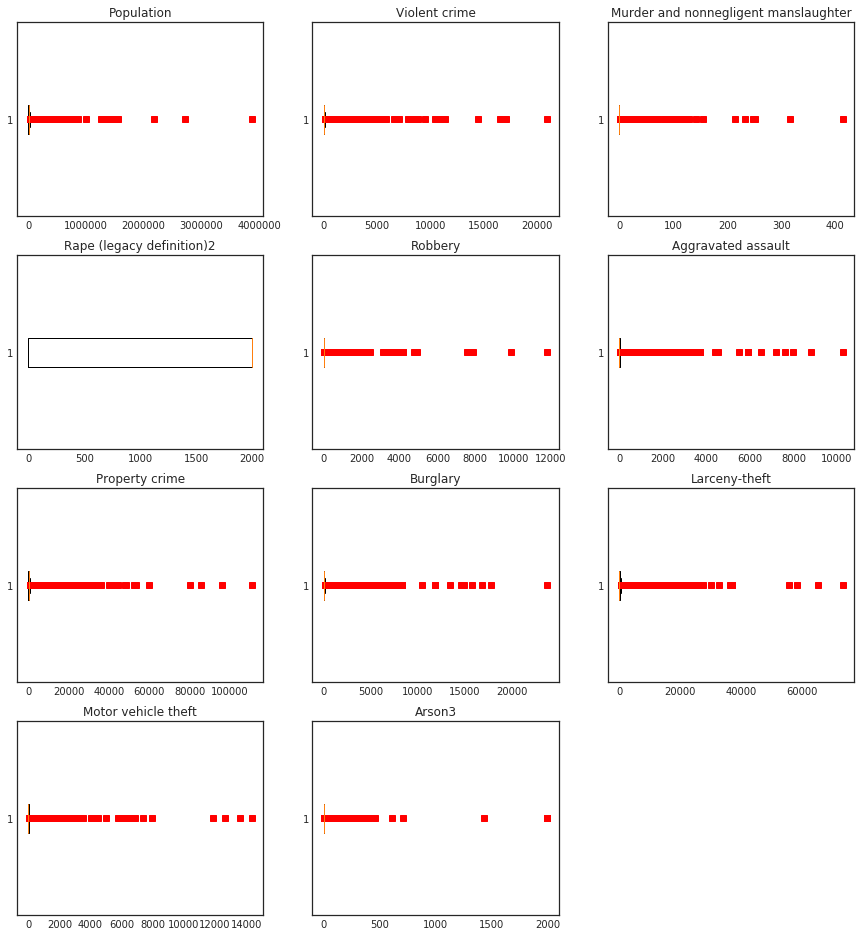

In [136]:
plt.figure(figsize=(15, 25))
counter=1

for i in check:
    plt.subplot(6,3,counter)
    plt.boxplot(df[i], 0, 'rs', 0)
    plt.title(i)
    counter+=1
plt.show()

In [137]:
df.describe()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3
count,9291.000000,9291.000000,9.291000e+03,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000
mean,25.650522,3533.973953,2.051172e+04,87.077602,1.066839,834.891293,1172.307071,28.925412,51.639651,655.591863,137.788074,462.419869,56.153697,104.878915
std,13.752143,2064.247256,8.128186e+04,562.922121,9.242898,982.628341,982.506445,261.608657,305.502001,3109.414023,688.486111,2081.174972,406.333483,439.089791
min,0.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1759.500000,2.318000e+03,2.000000,0.000000,1.000000,2.000000,0.000000,2.000000,36.000000,7.000000,25.000000,1.000000,0.000000
50%,28.000000,3514.000000,5.902000e+03,10.000000,0.000000,8.000000,2000.000000,1.000000,6.000000,118.000000,22.000000,87.000000,4.000000,0.000000
75%,37.000000,5307.000000,1.626750e+04,34.500000,0.000000,2000.000000,2000.000000,7.000000,22.000000,419.000000,75.000000,321.000000,16.000000,2.000000
max,49.000000,7141.000000,3.878725e+06,20993.000000,414.000000,2000.000000,2000.000000,11815.000000,10270.000000,110919.000000,23733.000000,73591.000000,14382.000000,2000.000000


In [138]:
# Assign low crime city
df['sumcrime'] = df['Violent crime']+df['Murder and nonnegligent manslaughter']+ df['Rape (revised definition)1']+ df['Rape (legacy definition)2']+ df['Aggravated assault']+ df['Robbery']+ df['Property crime']+ df['Burglary']+  df['Larceny-theft']+ df['Motor vehicle theft']+ df['Arson3']
df['crimerate'] = df['sumcrime']/df['Population'] 

In [139]:
df.describe()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3,sumcrime,crimerate
count,9291.000000,9291.000000,9.291000e+03,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000
mean,25.650522,3533.973953,2.051172e+04,87.077602,1.066839,834.891293,1172.307071,28.925412,51.639651,655.591863,137.788074,462.419869,56.153697,104.878915,3592.740286,0.944635
std,13.752143,2064.247256,8.128186e+04,562.922121,9.242898,982.628341,982.506445,261.608657,305.502001,3109.414023,688.486111,2081.174972,406.333483,439.089791,7310.874486,6.199681
min,0.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,0.037340
25%,13.000000,1759.500000,2.318000e+03,2.000000,0.000000,1.000000,2.000000,0.000000,2.000000,36.000000,7.000000,25.000000,1.000000,0.000000,2082.000000,0.186106
50%,28.000000,3514.000000,5.902000e+03,10.000000,0.000000,8.000000,2000.000000,1.000000,6.000000,118.000000,22.000000,87.000000,4.000000,0.000000,2291.000000,0.410237
75%,37.000000,5307.000000,1.626750e+04,34.500000,0.000000,2000.000000,2000.000000,7.000000,22.000000,419.000000,75.000000,321.000000,16.000000,2.000000,3145.000000,0.952840
max,49.000000,7141.000000,3.878725e+06,20993.000000,414.000000,2000.000000,2000.000000,11815.000000,10270.000000,110919.000000,23733.000000,73591.000000,14382.000000,2000.000000,266532.000000,400.000000


In [140]:
# the below 5%
p = np.percentile(df, 18)
round(p,20)

0.10019592331958271

In [141]:
df['goodCity'] = np.where(df['crimerate']<=0.1001959233, 1, 0)

In [142]:
from sklearn.model_selection import train_test_split

X = df.drop(['goodCity','sumcrime','crimerate'],axis=1)
y = df['goodCity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



# Logistic regression 

In [143]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)
fit = lr.fit(X_train, y_train)

print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[  1.02860504e-01   3.05070322e-05   1.43696997e-02  -1.73900517e-01
   -2.57332863e-02  -1.44141015e-01  -1.43842483e-01  -6.46414367e-02
   -1.43784899e-01  -2.14153865e-01  -6.58257927e-02  -7.35987924e-02
   -7.47273636e-02  -1.04921229e-01]]
[-0.00017412]

 Accuracy by admission status
goodCity     0    1
row_0              
0         8551    0
1            2  738

 Percentage accuracy
0.999784737918


# Lasso

In [150]:
lass = linear_model.Lasso(alpha=.25)
lassfit = lass.fit(X_train, y_train)
print('R² for the model with few features:')
print(lass.score(X_train, y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.25)
lassBig.fit(X_train, y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train, y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.209463933038

Parameter estimates for the model with few features:
[ -4.23357634e-04   4.36424284e-07   3.71623670e-06  -3.34411349e-06
   0.00000000e+00   1.86093706e-05  -0.00000000e+00  -3.17885131e-04
  -0.00000000e+00  -4.52809928e-05   6.77799652e-05  -1.89280582e-06
  -1.71282626e-04  -3.72647537e-05   4.13230878e-02]

R² for the model with many features:
0.209463933038

Parameter estimates for the model with many features:
[ -4.23357634e-04   4.36424284e-07   3.71623670e-06  -3.34411349e-06
   0.00000000e+00   1.86093706e-05  -0.00000000e+00  -3.17885131e-04
  -0.00000000e+00  -4.52809928e-05   6.77799652e-05  -1.89280582e-06
  -1.71282626e-04  -3.72647537e-05   4.13230878e-02]


/home/ll/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


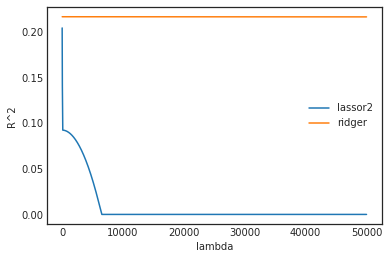

In [153]:
from sklearn import linear_model

lasso = []
ridger = []
alpha = []
for i in range(1, 50000):
    alpha.append(i)
    lass = linear_model.Lasso(alpha=i)
    lass.fit(X_train, y_train)
    lasso.append(lass.score(X_train, y_train))
    ridgeregrBig = linear_model.Ridge(alpha=i, fit_intercept=False)
    ridgeregrBig.fit(X_train, y_train)
    ridger.append(ridgeregrBig.score(X_train, y_train))

df = pd.DataFrame({
    'alpha':alpha,
    'lassr2':lasso,
    'ridger2':ridger
    })

labels = []
plt.plot(df['alpha'], df['lassr2'])
labels.append('lassor2')

plt.plot(df['alpha'], df['ridger2'])
labels.append('ridger')

plt.xlabel('lambda')
plt.ylabel('R^2')
plt.legend(labels)
plt.show()